In [ ]:
# ! pip install lifelines


In [ ]:
# pip install scikit-survival

In [25]:
from lifelines.datasets import load_waltons, load_rossi
from lifelines import KaplanMeierFitter, CoxPHFitter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sksurv.util import Surv
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.linear_model import CoxPHSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest
from sklearn.linear_model import LogisticRegression
from statsmodels.formula.api import logit
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score

In [33]:
X = rossi[['week', 'fin', 'age', 'race', 'wexp', 'mar', 'paro', 'prio']].values
y = rossi ['arrest'].values

In [35]:
lg = LogisticRegression(max_iter=500)
lg.fit(X,y)
lg.score(X,y)

0.9907407407407407

In [36]:
y_score = lg.predict_proba(X)[:,1]

In [37]:
fpr, tpr, thresholds = roc_curve(y, y_score)

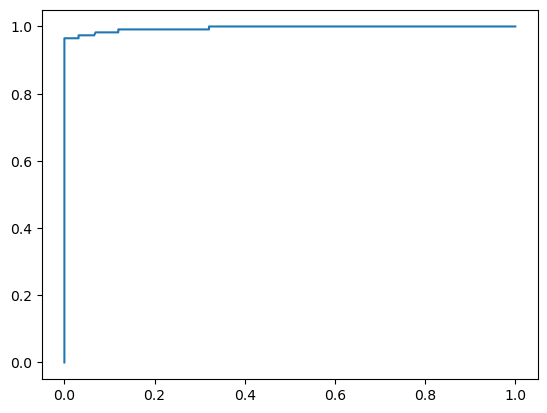

In [38]:
plt.plot(fpr, tpr)
plt.show()

H0: X_i = 0 
H1: X_i != 0

H0: X_1 = X_2 = 0 
H1: X_i != 0

In [24]:
rossi = load_rossi()
rossi

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...
427,52,0,1,31,0,1,0,1,3
428,52,0,0,20,1,0,0,1,1
429,52,0,1,20,1,1,1,1,1
430,52,0,0,29,1,1,0,1,3


## Loại bỏ các biến ko có ý nghĩa trong mô hình: paro, wexp, race, mar

In [26]:
result = logit(formula= 'arrest ~ fin + age + prio', data=rossi).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.545186
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 arrest   No. Observations:                  432
Model:                          Logit   Df Residuals:                      428
Method:                           MLE   Df Model:                            3
Date:                Sun, 17 Aug 2025   Pseudo R-squ.:                 0.05528
Time:                        10:44:20   Log-Likelihood:                -235.52
converged:                       True   LL-Null:                       -249.30
Covariance Type:            nonrobust   LLR p-value:                 4.490e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6565      0.577      1.139      0.255      -0.474       1.787
fin           -0.4057      0.227     -1.789      0.074      -0.850       0.039
age           -0.0765      0.023     -3.301      0.001      -0.122      -0.031
prio           0.1056      0.036      2.909      0.004       0.034       0.177
==============================================================================
"""

In [27]:
# < 0.5 => 0
# >= 0.5 => 1
y_score = result.predict(rossi).values

In [28]:
y_pred = [1 if v >= 0.5 else 0 for v in y_score]
y_true = rossi['arrest'].values

In [29]:
accuracy_score(y_true, y_pred)

0.7430555555555556

In [30]:
fpr, tpr, thresholds = roc_curve(y_true, y_score)

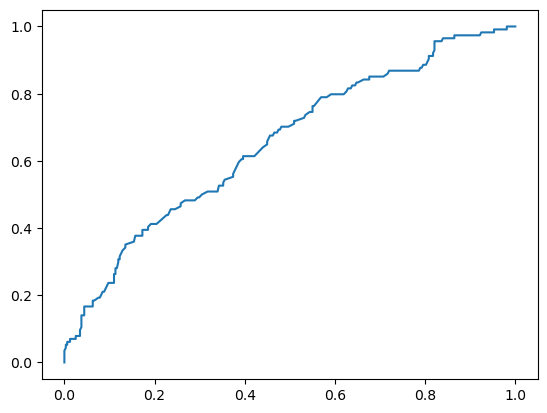

In [31]:
# Print ROC curve
plt.plot(fpr,tpr)
plt.show()

In [32]:
roc_auc_score(y_true, y_score)

0.6537432417521791

In [3]:
data = load_waltons()
data.head()

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137


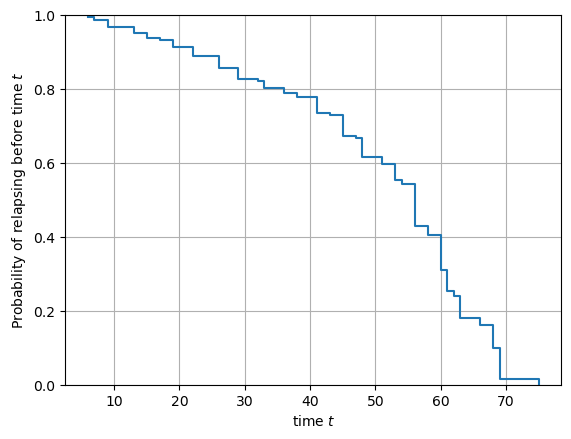

In [20]:
times, km_estimate = kaplan_meier_estimator(event=data['E'] == 1, time_exit=data['T'])

plt.step(times, km_estimate, where="post")
plt.xlabel("time $t$")
plt.ylabel("Probability of relapsing before time $t$")
plt.ylim(0, 1)
plt.grid()

In [21]:
y= Surv.from_dataframe(event='arrest', time='week', data=rossi)
X= rossi[['fin', 'age', 'prio']]
cph = CoxPHSurvivalAnalysis()
cph.fit(X,y)
cph.score(X,y)

0.630160631252642

In [22]:
X = rossi.drop(columns=['arrest', 'week'])
rsf = RandomSurvivalForest()
rsf.fit(X,y)
rsf.score(X,y)

0.8256657742708187

In [4]:
data['group'].value_counts()

group
control    129
miR-137     34
Name: count, dtype: int64

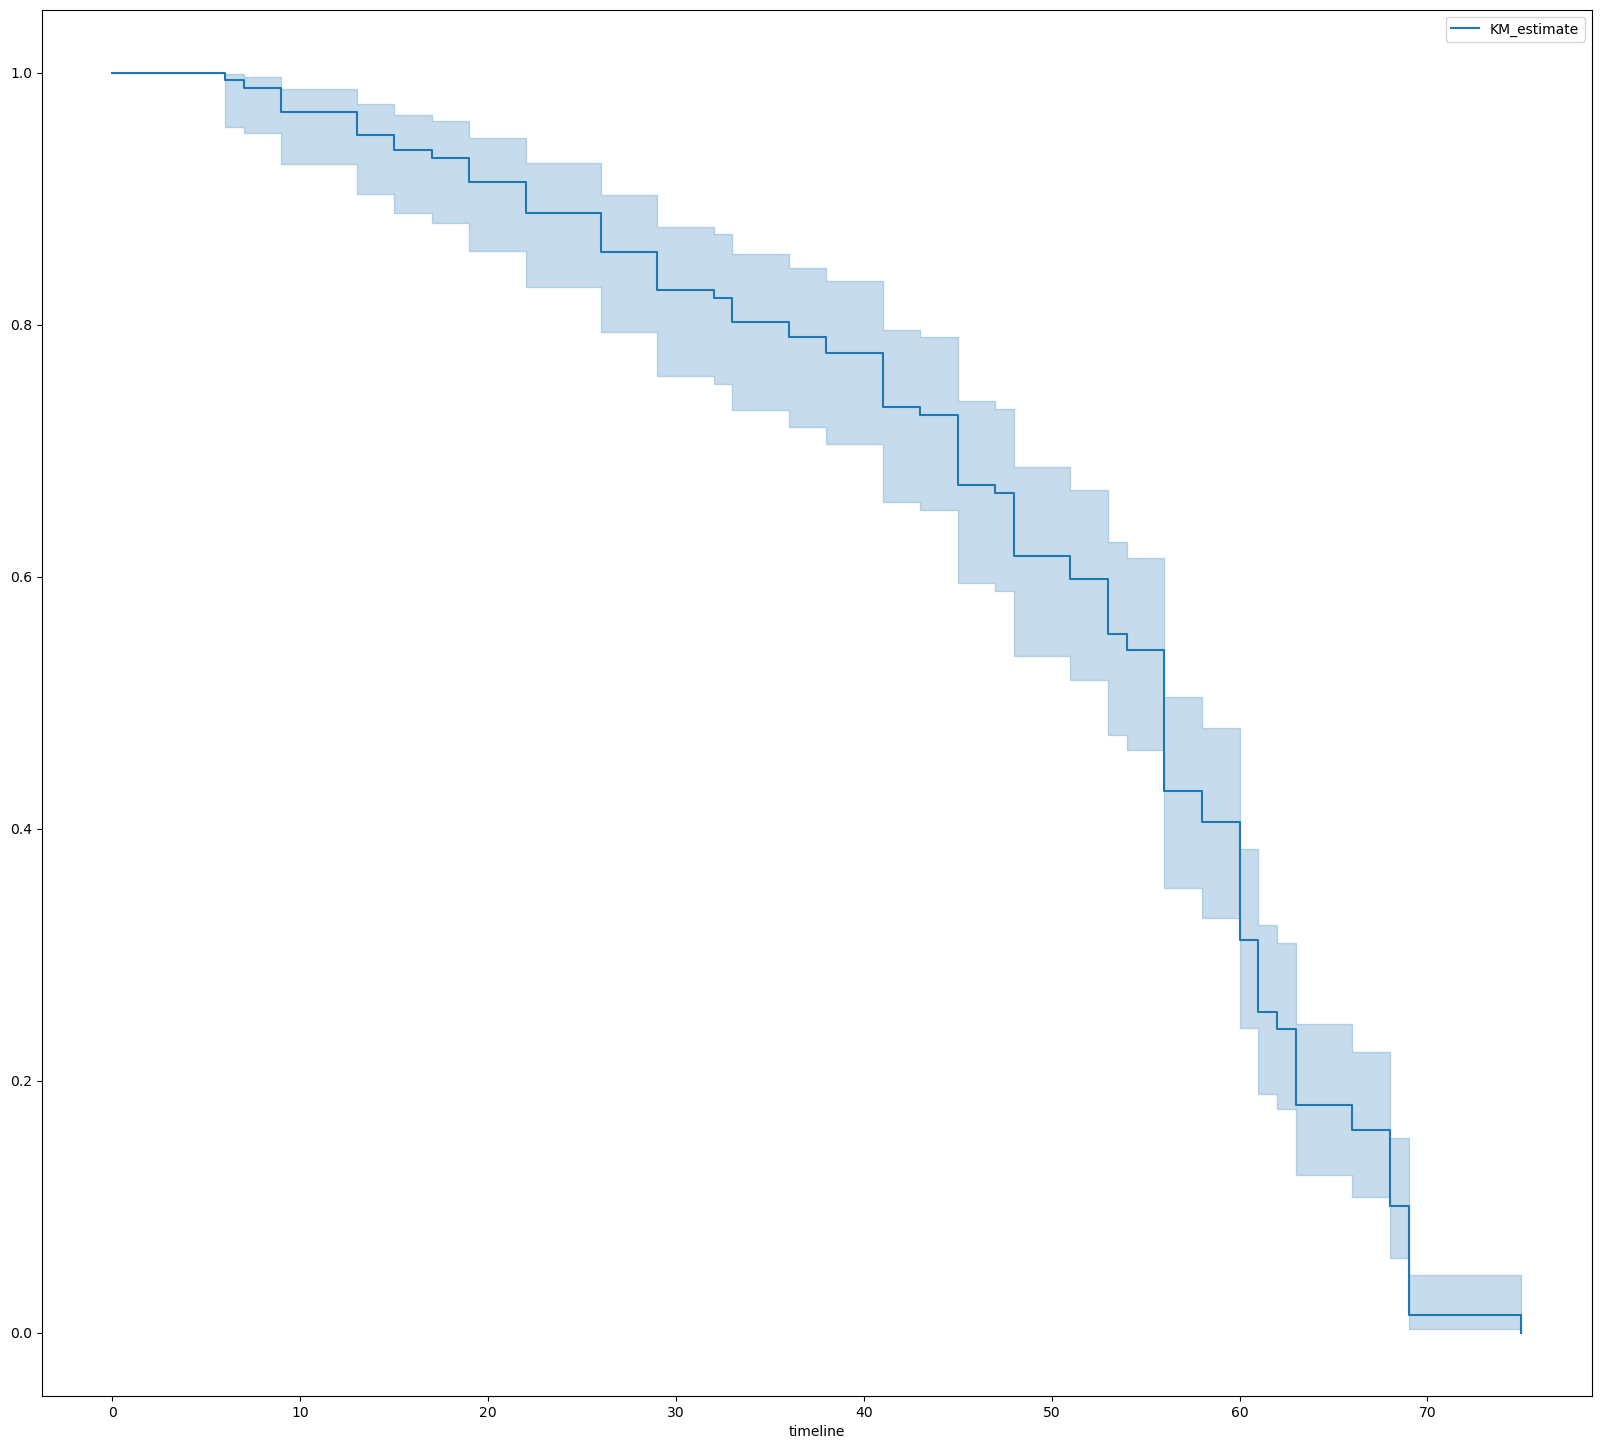

In [5]:
#alpha =mức ý nghĩa => 0.05
plt.figure(figsize=(20,18))
kmf = KaplanMeierFitter()
kmf.fit(durations = data['T'], event_observed = data['E'])
kmf.plot()
plt.show()

In [6]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,163,163
6.0,1,1,0,0,163
7.0,2,1,1,0,162
9.0,3,3,0,0,160
13.0,3,3,0,0,157
15.0,2,2,0,0,154
17.0,1,1,0,0,152
19.0,3,3,0,0,151
22.0,4,4,0,0,148


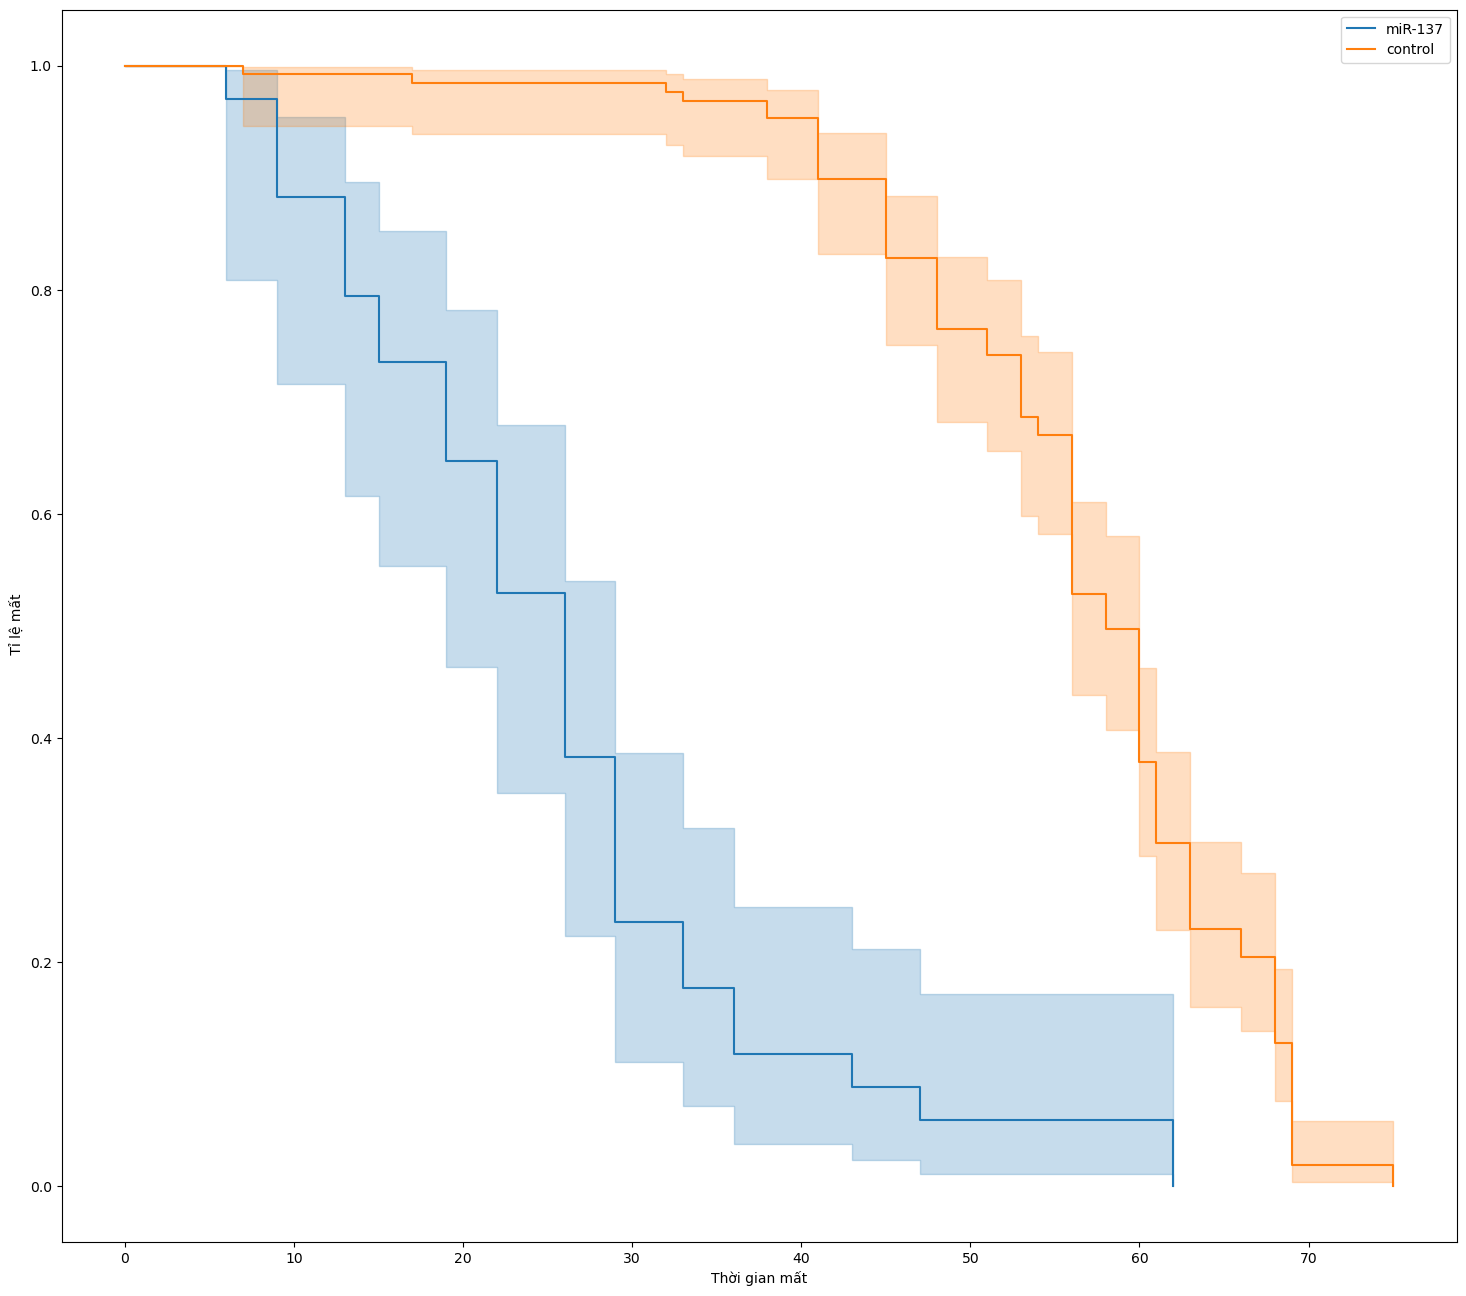

In [7]:
plt.figure(figsize=(18,16))
kmf = KaplanMeierFitter()
for group in data['group'].unique():
    sub_group = data[data['group'] == group]
    kmf.fit(durations= sub_group['T'], event_observed= sub_group['E'],label= group)
    kmf.plot()
plt.ylabel(' Tỉ lệ mất')
plt.xlabel('Thời gian mất')
plt.show()

In [8]:
rossi = load_rossi()
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


In [9]:
rossi['arrest'].value_counts()

arrest
0    318
1    114
Name: count, dtype: int64

In [10]:
#alpha = 0.05
cph = CoxPHFitter()
cph.fit(rossi, duration_col ='week', event_col = 'arrest')

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>

In [11]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2025-08-17 02:10:22 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
fin       -0.38      0.68      0.19           -0.75           -0.00                0.47                1.00
age       -0.06      0.94      0.02           -0.10           -0.01                0.90                0.99
race       0.31      1.37      0.31           -0.29            0.92                0.75                2.50
wexp      -0.15      0.86      0.21           -0.57            0.27                0.57                1.30
mar       -0.43      0.65      0.38           -1.18            0.31                0.31                1.37
paro      -0.08      0.92      0.20           -0.47            0.30                0.63                1.35
prio       0.09      1.10      0.03            0.04            0.15                1.04                1.16

           cmp to     z      p  -log2(p)
covariate                               
fin          0.00 -1.98   0.05      4.40
age          0.00 -2.61   0.01      6.79
race         0.00  1.02   0.31      1.70
wexp         0.00 -0.71   0.48      1.06
mar          0.00 -1.14   0.26      1.97
paro         0.00 -0.43   0.66      0.59
prio         0.00  3.19 <0.005      9.48
---
Concordance = 0.64
Partial AIC = 1331.50
log-likelihood ratio test = 33.27 on 7 df
-log2(p) of ll-ratio test = 15.37

<Axes: xlabel='HR (95% CI)'>

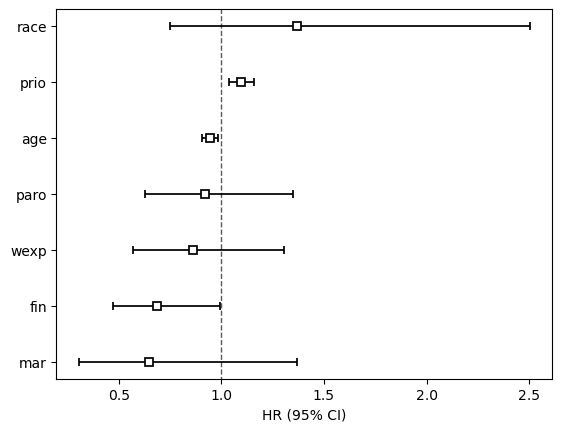

In [13]:
cph.plot(hazard_ratios=True)

In [16]:
rossi.columns

Index(['week', 'arrest', 'fin', 'age', 'race', 'wexp', 'mar', 'paro', 'prio'], dtype='object')

## Loại bỏ các biến ko có ý nghĩa trong mô hình hồi qui Cox:'race', 'wexp', 'mar', 'paro',

In [14]:
cph = CoxPHFitter()
cph.fit(df=rossi, duration_col ='week', event_col='arrest', formula='fin + age + prio')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -660.86
         time fit was run = 2025-08-17 02:40:09 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
fin       -0.35      0.71      0.19           -0.72            0.03                0.49                1.03
age       -0.07      0.94      0.02           -0.11           -0.03                0.90                0.97
prio       0.10      1.10      0.03            0.04            0.15                1.04                1.16

           cmp to     z      p  -log2(p)
covariate                               
fin          0.00 -1.82   0.07      3.87
age          0.00 -3.22 <0.005      9.60
prio         0.00  3.56 <0.005     11.37
---
Concordance = 0.63
Partial AIC = 1327.71
log-likelihood ratio test = 29.05 on 3 df
-log2(p) of ll-ratio test = 18.80

<Axes: xlabel='HR (95% CI)'>

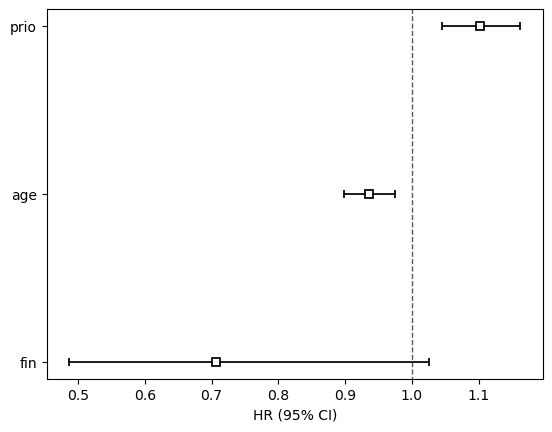

In [15]:
cph.plot(hazard_ratios=True)

<Axes: xlabel='log(HR) (95% CI)'>

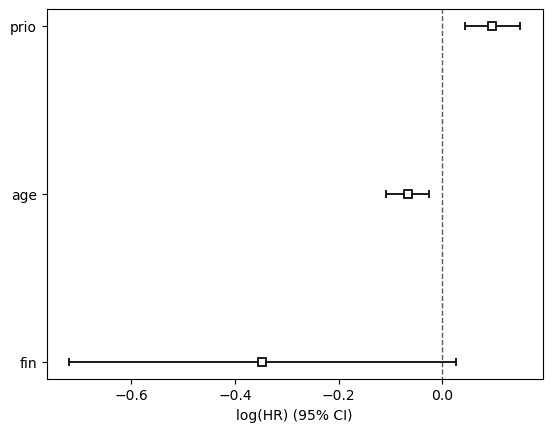

In [17]:
cph.plot(hazard_ratios=False)

### Mức ý nghia alpha = 0.05
## $$\text{Gia thiết} H_0: X_i = 0$$
## $$ \text{Giả thiết} H_1:X_i !=0$$
## Nếu p-value_i <=alpha => ba bỏ H_) tương ứng X_i != 0 ngược lại, không thể bác bỏ H_0 => X_i = 0

In [12]:
rossi.columns

Index(['week', 'arrest', 'fin', 'age', 'race', 'wexp', 'mar', 'paro', 'prio'], dtype='object')

In [ ]:
#alpha= 0.05
cph = CoxPHFitter()
cols =['week','arrest', 'fin','age','prio']
cph.fit(rossi[cols], duration_col ='week', event_col='arrest')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
      baseline estimation = breslow
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -660.86
         time fit was run = 2025-08-16 13:06:57 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
fin       -0.35      0.71      0.19           -0.72            0.03                0.49                1.03
age       -0.07      0.94      0.02           -0.11           -0.03                0.90                0.97
prio       0.10      1.10      0.03            0.04            0.15                1.04                1.16

           cmp to     z      p  -log2(p)
covariate                               
fin          0.00 -1.82   0.07      3.87
age          0.00 -3.22 <0.005      9.60
prio         0.00  3.56 <0.005     11.37
---
Concordance = 0.63
Partial AIC = 1327.71
log-likelihood ratio test = 29.05 on 3 df
-log2(p) of ll-ratio test = 18.80

In [11]:
df = pd.read_csv('NPAR.csv')
df.head()

,subject_id,hadm_id,stay_id,gender,race,age,neutrophils_max,albumin_max,bun_max,npar,los,hosp_mortality,icu_mortality,mortality_30d,mortality_90d,mortality_1y
0,10004606,29242151,30213599,F,WHITE,64,71.7,3.6,11,19.916667,5.166100,0,0,0,0,0
1,10010888,20162667,33318955,M,WHITE,43,88.0,3.1,71,28.387097,9.019225,0,0,0,0,0
2,10017531,22580355,35526828,M,WHITE,64,90.8,3.9,33,23.282051,31.809965,0,0,0,0,0
3,10020740,23831430,35026312,M,WHITE,56,81.5,2.1,17,38.809524,7.446424,0,0,0,0,0
4,10021487,27660781,35065627,M,WHITE,44,79.4,2.4,7,33.083333,1.788611,0,0,0,0,0


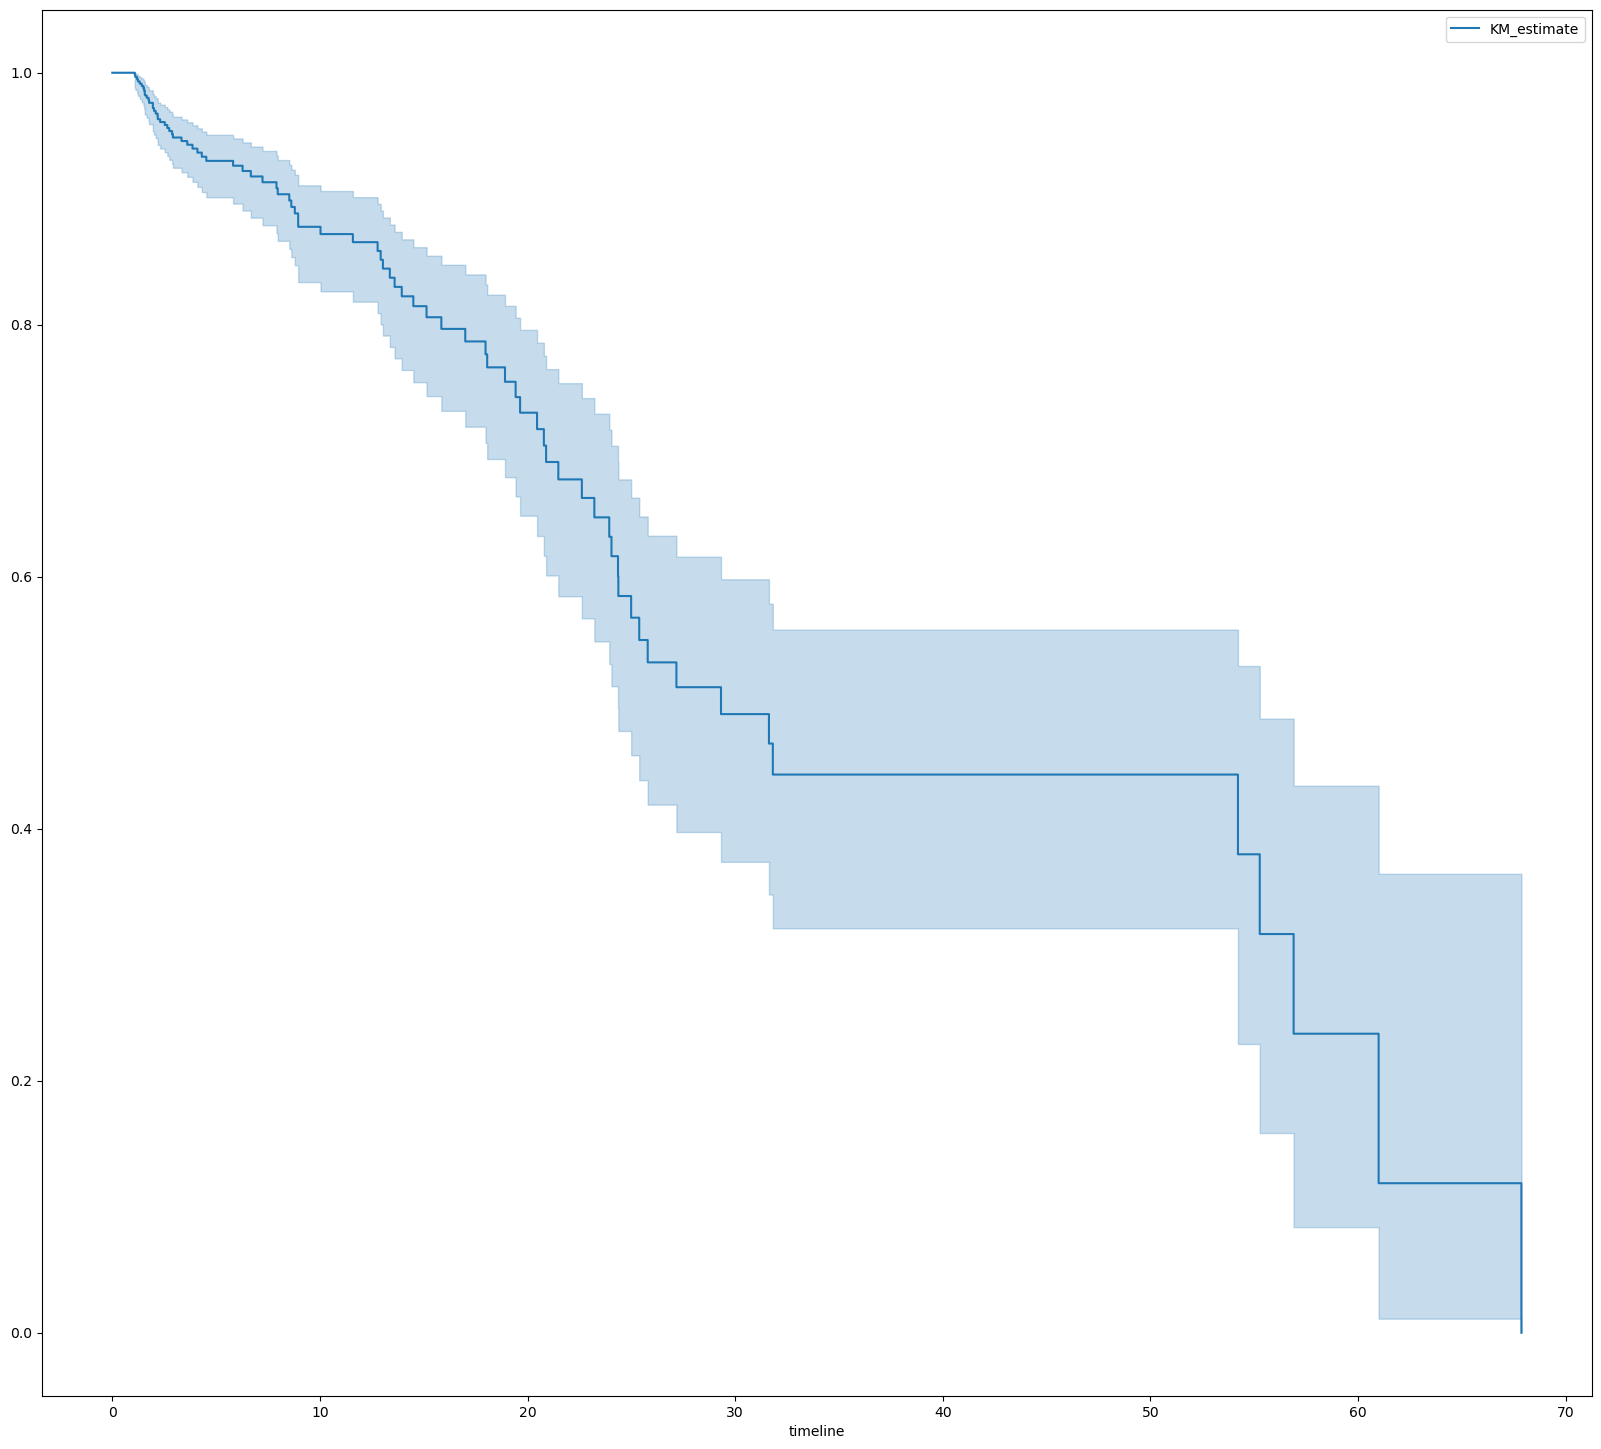

In [12]:
plt.figure(figsize=(20, 18))
kmf = KaplanMeierFitter()
kmf.fit(durations=df['los'], event_observed=df['icu_mortality'])
kmf.plot()
plt.show()


In [13]:
df['duration_30d'] = np.where((df['mortality_30d'] == 0) & (df['los'] > 30), 30, df['los'])
df['duration_90d'] = np.where((df['mortality_90d'] == 0) & (df['los'] > 90), 90, df['los'])
df['duration_1y']  = np.where((df['mortality_1y']  == 0) & (df['los'] > 365), 365, df['los'])


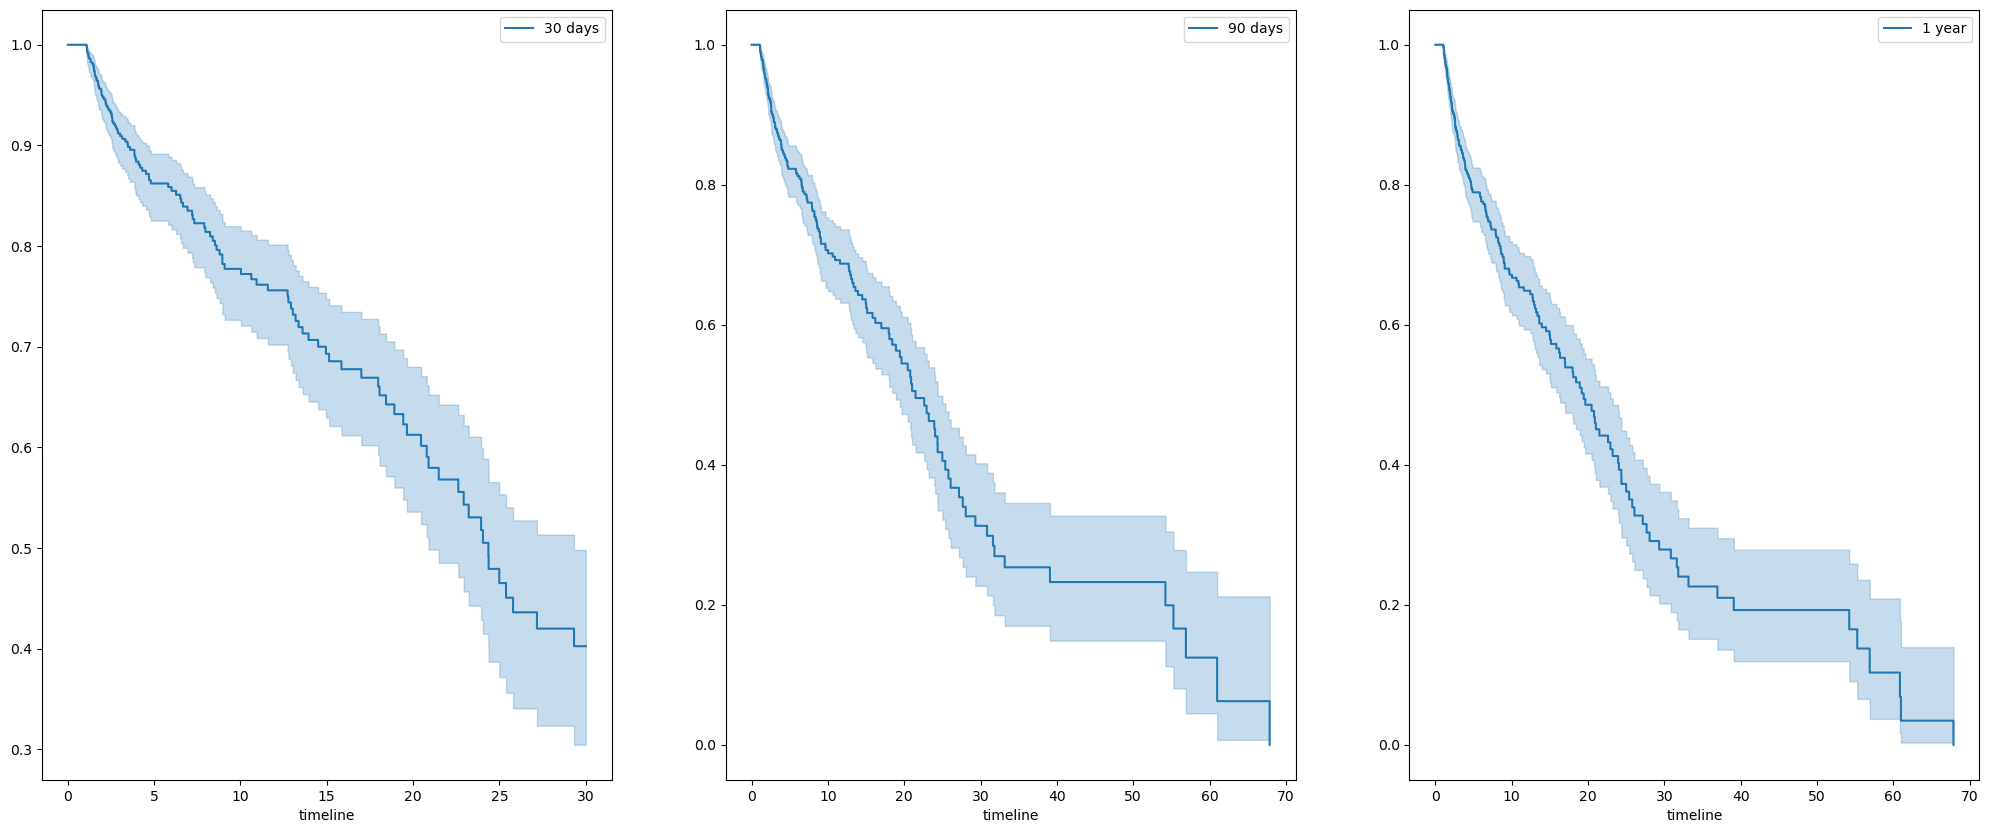

In [14]:
durations = ['duration_30d', 'duration_90d', 'duration_1y']
events = ['mortality_30d', 'mortality_90d', 'mortality_1y']
titles = ['30 days', '90 days', '1 year']
fig, axes = plt.subplots(1, 3, figsize=(25, 10))
axes.flatten()
kmf = KaplanMeierFitter()
for i in range(len(durations)):
    ax = axes[i]
    kmf.fit(durations=df[durations[i]], event_observed=df[events[i]], label=titles[i])
    kmf.plot(ax=ax)
plt.show()
